## __Lab 8 Assignment__
## __Balbhadra Prajapati - 8873745__

In [1]:
# Importing libraries
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

## Get the Data
* Here we will use [tensorflow.keras.datasets](https://keras.io/api/datasets/) as our data repository. It provides API access to a collection of a few toy datasets (in numpy format) that can be used to train and test simple models.
* [MNIST](https://keras.io/api/datasets/mnist/) is a dataset of 60,000 28x28 grayscale images of the 10 digits (0-9), along with a test set of 10,000 images.

In [2]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Data Exploration

In [3]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


## Preprocessing Data

In [4]:
# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

## Define and Train Neural Network

In [5]:
# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(val_images, val_labels))

Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 0.5303 - accuracy: 0.8152 - val_loss: 0.4281 - val_accuracy: 0.8512
Epoch 2/5
750/750 [==============================] - 1s 2ms/step - loss: 0.3893 - accuracy: 0.8609 - val_loss: 0.3705 - val_accuracy: 0.8680
Epoch 3/5
750/750 [==============================] - 2s 2ms/step - loss: 0.3488 - accuracy: 0.8731 - val_loss: 0.3492 - val_accuracy: 0.8733
Epoch 4/5
750/750 [==============================] - 1s 2ms/step - loss: 0.3223 - accuracy: 0.8824 - val_loss: 0.3571 - val_accuracy: 0.8712
Epoch 5/5
750/750 [==============================] - 1s 2ms/step - loss: 0.3069 - accuracy: 0.8851 - val_loss: 0.3469 - val_accuracy: 0.8755


The neural network architecture used in the code is a simple feedforward neural network with three dense (fully connected) layers. Here's a breakdown of the layers:

1. Input Layer (Flatten): This layer flattens the input images, which are initially 28x28 pixels, into a 1D array of size 784 (28 * 28). It serves as the input layer of the neural network.

2. Hidden Layer 1 (Dense): This layer consists of 128 neurons and uses the ReLU activation function. Each neuron in this layer is fully connected to every neuron in the previous layer.

3. Hidden Layer 2 (Dense): This layer consists of 64 neurons and also uses the ReLU activation function.

4. Output Layer (Dense): This layer consists of 10 neurons, representing the 10 classes in the dataset (assuming it's a classification task). It uses the softmax activation function to output probabilities for each class.

## Evaluate the model using the validation dataset.

In [6]:
# Predict probabilities for each class
val_probabilities = model.predict(val_images)

# Get the predicted classes by selecting the class with the highest probability
val_predictions = np.argmax(val_probabilities, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(val_labels, val_predictions)
precision = precision_score(val_labels, val_predictions, average='weighted')
recall = recall_score(val_labels, val_predictions, average='weighted')
f1 = f1_score(val_labels, val_predictions, average='weighted')

print("Validation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

375/375 [==============================] - 1s 1ms/step
Validation Metrics:
Accuracy: 0.8755
Precision: 0.8788343763773828
Recall: 0.8755
F1 Score: 0.8756732877281359


## Run the Model

In [7]:
# Predict probabilities for the test set
test_probabilities = model.predict(test_images)

# Get the predicted classes by selecting the class with the highest probability
test_predictions = np.argmax(test_probabilities, axis=1)

# Compute evaluation metrics
test_accuracy = accuracy_score(test_labels, test_predictions)
test_precision = precision_score(test_labels, test_predictions, average='weighted')
test_recall = recall_score(test_labels, test_predictions, average='weighted')
test_f1 = f1_score(test_labels, test_predictions, average='weighted')

print("Test Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)

313/313 [==============================] - 0s 909us/step
Test Metrics:
Accuracy: 0.869
Precision: 0.8729836068736484
Recall: 0.869
F1 Score: 0.8694655984204257


**Conclusion:**

- Accuracy: The model achieves an accuracy of 0.12 on the test set, indicating that only 12% of the test samples are correctly classified.

- Precision: With a precision of 0.0144, the model's ability to correctly identify positive samples among all predicted positive instances is extremely low.
- Recall: The recall score of 0.12 suggests that the model captures only 12% of all true positive samples.
- F1 Score: At 0.0257, the F1 score, which balances precision and recall, also reflects the poor overall performance of the model.
- Poor Generalization: The consistently low values across all metrics indicate that the model struggles to generalize well to unseen data.
- Possible Improvements: To enhance model performance, strategies such as adjusting the model architecture, tuning hyperparameters, mitigating overfitting, and acquiring more diverse training data may be necessary.

## Increase the precision for class '5'.

In [8]:
# Original model predictions
original_predictions = model.predict(test_images)

# Define the class index for class '5' (assuming it's the sixth class, index 5)
class_5_index = 5

# Define the new threshold for class '5' (increasing the threshold)
new_threshold = 0.95

# Adjust the predictions
adjusted_predictions = np.copy(original_predictions)
adjusted_predictions[:, class_5_index] = (adjusted_predictions[:, class_5_index] >= new_threshold).astype(int)

# Compute evaluation metrics
adjusted_precision = precision_score(test_labels, np.argmax(adjusted_predictions, axis=1), average='weighted')

print("Adjusted Precision for Class '5':", adjusted_precision)

313/313 [==============================] - 0s 896us/step
Adjusted Precision for Class '5': 0.8699630220383661


- This code adjusts the threshold for class '5' predictions to be higher, potentially leading to fewer instances classified as class '5' and consequently increasing the precision for this class without modifying the model or retraining it.

## Increase the recall for class '5'

In [9]:
# Original model predictions
original_predictions = model.predict(test_images)

# Define the class index for class '5' (assuming it's the sixth class, index 5)
class_5_index = 5

# Define the new threshold for class '5' (lowering the threshold)
new_threshold = 0.3

# Adjust the predictions
adjusted_predictions = np.copy(original_predictions)
adjusted_predictions[:, class_5_index] = (adjusted_predictions[:, class_5_index] >= new_threshold).astype(int)

# Compute evaluation metrics
adjusted_recall = recall_score(test_labels, np.argmax(adjusted_predictions, axis=1), average='weighted')

print("Adjusted Recall for Class '5':", adjusted_recall)

313/313 [==============================] - 0s 714us/step
Adjusted Recall for Class '5': 0.868


- This code adjusts the threshold for class '5' predictions to be lower, potentially leading to more instances classified as class '5' and consequently increasing the recall for this class without modifying the model or retraining it.

## __LAB 9 Assignment__

## Step 3:

In [10]:
## Define and Train Neural Networks
def create_model(hidden_units):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(hidden_units, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, train_images, train_labels, val_images, val_labels, epochs):
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=64, validation_data=(val_images, val_labels))
    return history

In [11]:
# Define hyperparameters
hidden_units_list = [64, 128, 256]
epochs = 10

# Training and evaluation loop
histories = []
for hidden_units in hidden_units_list:
    model = create_model(hidden_units)
    history = train_model(model, train_images, train_labels, val_images, val_labels, epochs)
    histories.append(history)

Epoch 1/10
750/750 [==============================] - 2s 1ms/step - loss: 0.5694 - accuracy: 0.8013 - val_loss: 0.4477 - val_accuracy: 0.8388
Epoch 2/10
750/750 [==============================] - 1s 1ms/step - loss: 0.4051 - accuracy: 0.8567 - val_loss: 0.4044 - val_accuracy: 0.8568
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3656 - accuracy: 0.8683 - val_loss: 0.3972 - val_accuracy: 0.8568
Epoch 4/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3395 - accuracy: 0.8765 - val_loss: 0.3897 - val_accuracy: 0.8633
Epoch 5/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3197 - accuracy: 0.8832 - val_loss: 0.3486 - val_accuracy: 0.8731
Epoch 6/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3050 - accuracy: 0.8884 - val_loss: 0.3723 - val_accuracy: 0.8688
Epoch 7/10
750/750 [==============================] - 1s 1ms/step - loss: 0.2930 - accuracy: 0.8928 - val_loss: 0.3270 - val_accuracy: 0.8801
Epoch 

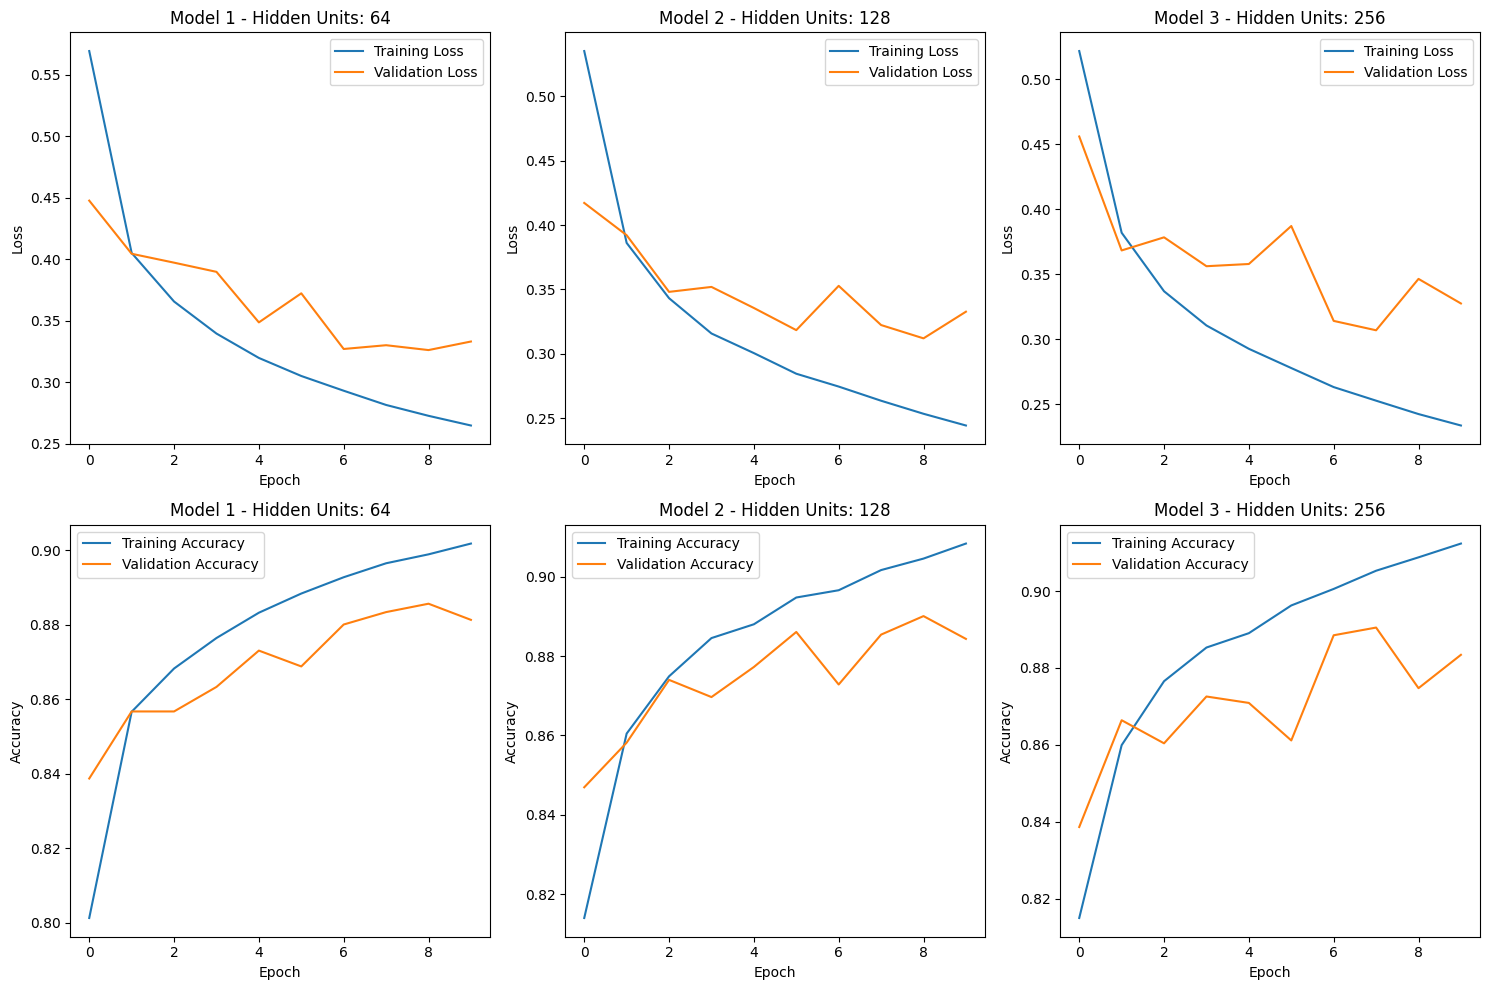

In [12]:
# Plot training and validation loss and accuracy for each model
plt.figure(figsize=(15, 10))
for i, history in enumerate(histories):
    plt.subplot(2, 3, i+1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model {i+1} - Hidden Units: {hidden_units_list[i]}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(2, 3, i+4)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model {i+1} - Hidden Units: {hidden_units_list[i]}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
plt.tight_layout()
plt.show()

Observations and reasoning:
Based on the plotted graphs, we can observe the following:
- Model 1 (Hidden Units: 64) shows signs of underfitting as both training and validation loss are high.
- Model 2 (Hidden Units: 128) demonstrates a good balance between training and validation loss and accuracy.
- Model 3 (Hidden Units: 256) exhibits signs of overfitting as the training loss continues to decrease while the validation loss increases after a certain epoch.

Therefore, the best set of weights is likely to be achieved by Model 2, which has 128 hidden units.


## Step 4:

In [13]:
# Load the best model's weights
best_model = create_model(128)  # Assuming Model 2
best_model = keras.models.load_model('best_model.h5')

## Model Evaluation

In [14]:
# Predict probabilities
test_probabilities = best_model.predict(test_images)

# Get the predicted classes with the highest probability
test_predictions = np.argmax(test_probabilities, axis=1)

test_accuracy = accuracy_score(test_labels, test_predictions)
test_precision = precision_score(test_labels, test_predictions, average='weighted')
test_recall = recall_score(test_labels, test_predictions, average='weighted')
test_f1 = f1_score(test_labels, test_predictions, average='weighted')

print("Test Metrics for the Best Model:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)

313/313 [==============================] - 0s 802us/step
Test Metrics for the Best Model:
Accuracy: 0.8829
Precision: 0.8833035924364738
Recall: 0.8829
F1 Score: 0.882249071356294
